In [1]:
required_packages <- c("plgp", "lhs", "mvtnorm")
install.packages(setdiff(required_packages, rownames(installed.packages())))

In [2]:
library(plgp)
library(lhs)
library(mvtnorm)

Loading required package: mvtnorm

Loading required package: tgp



## 5.1 Gaussian process prior

In [3]:
eps <- sqrt(.Machine$double.eps) 

In [4]:
n <- 100
X <- matrix(seq(0, 10, length=n), ncol=1)

In [5]:
D <- distance(X)
Sigma <- exp(-D) + diag(eps, n) 

In [6]:
Y <- rmvnorm(1, sigma=Sigma)

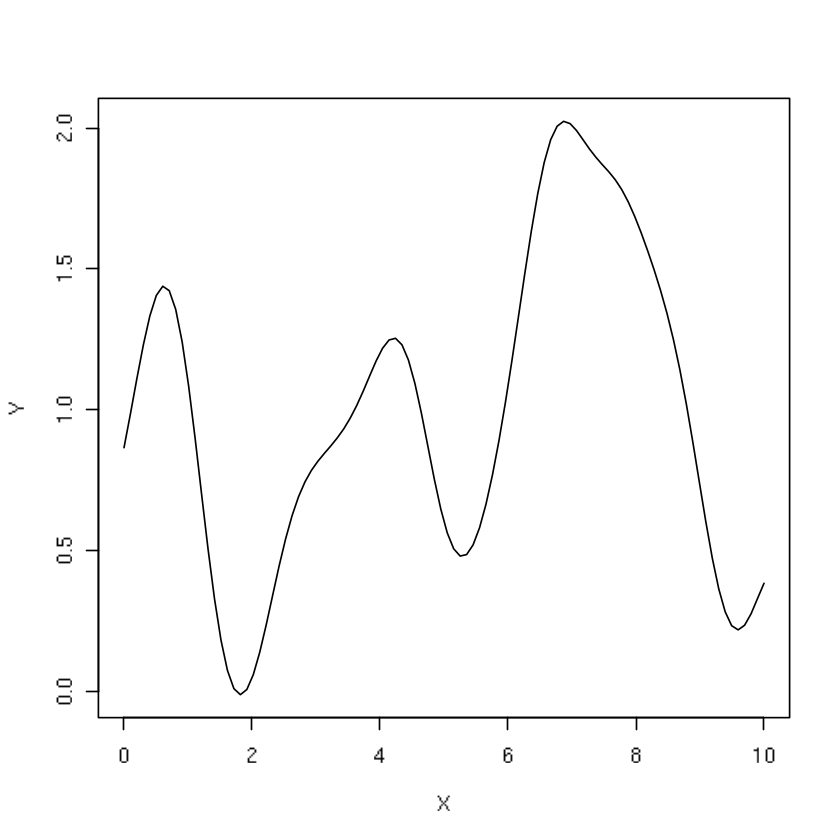

In [7]:
plot(X, Y, type="l")

In [8]:
c(exp(-1^2), exp(-4^2))

[1] 3.678794e-01 1.125352e-07

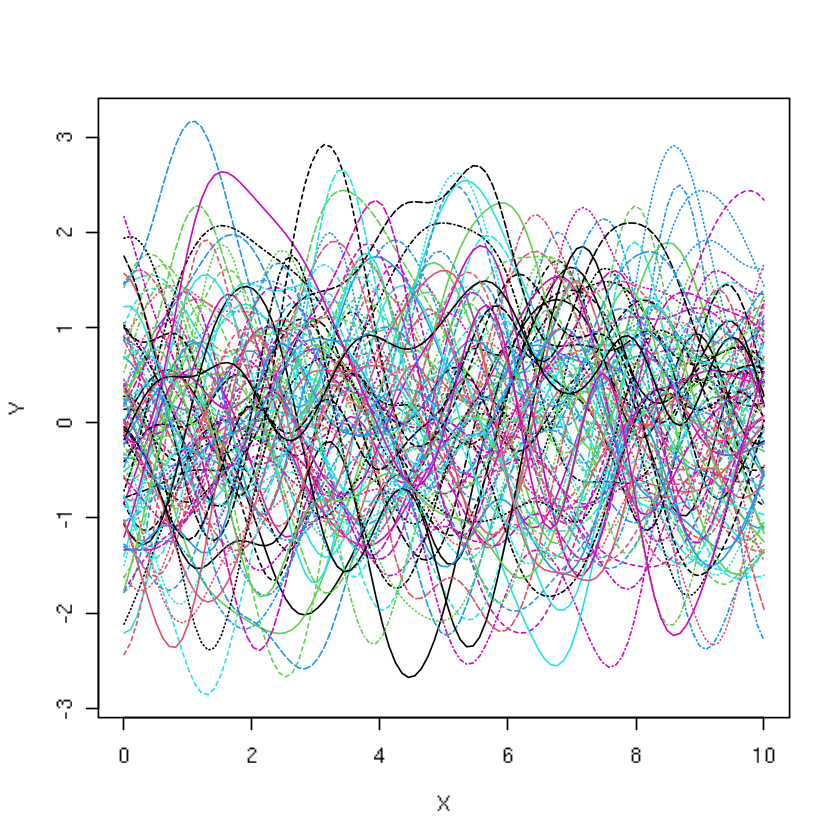

In [9]:
Y <- rmvnorm(100, sigma=Sigma)
matplot(X, t(Y), type="l", ylab="Y")

In [10]:
n <- 8
X <- matrix(seq(0, 2*pi, length=n), ncol=1)
y <- sin(X)
D <- distance(X) 
Sigma <- exp(-D) + diag(eps, ncol(D))

In [11]:
XX <- matrix(seq(-5.5, 2*pi + 5.5, length=100), ncol=1)
DXX <- distance(XX)
SXX <- exp(-DXX) + diag(eps, ncol(DXX))

In [12]:
DX <- distance(XX, X)
SX <- exp(-DX) 

In [13]:
Si <- solve(Sigma)
mup <- SX %*% Si %*% y
Sigmap <- SXX - SX %*% Si %*% t(SX)

In [14]:
YY <- rmvnorm(100, mup, Sigmap)

In [15]:
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap)))

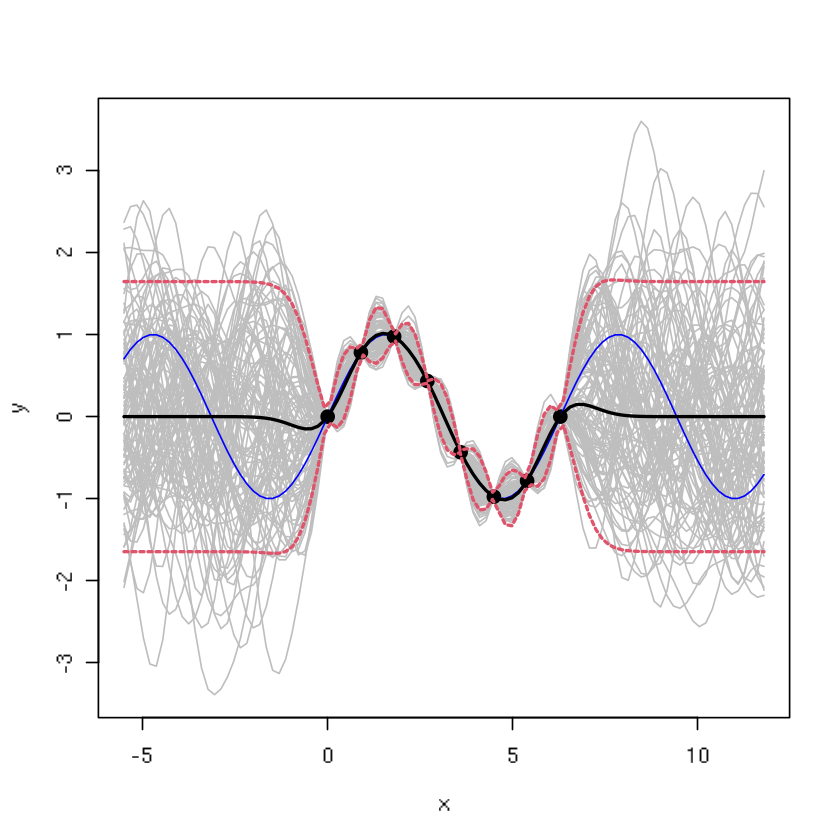

In [16]:
matplot(XX, t(YY), type="l", col="gray", lty=1, xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, sin(XX), col="blue")
lines(XX, mup, lwd=2)
lines(XX, q1, lwd=2, lty=2, col=2)
lines(XX, q2, lwd=2, lty=2, col=2)

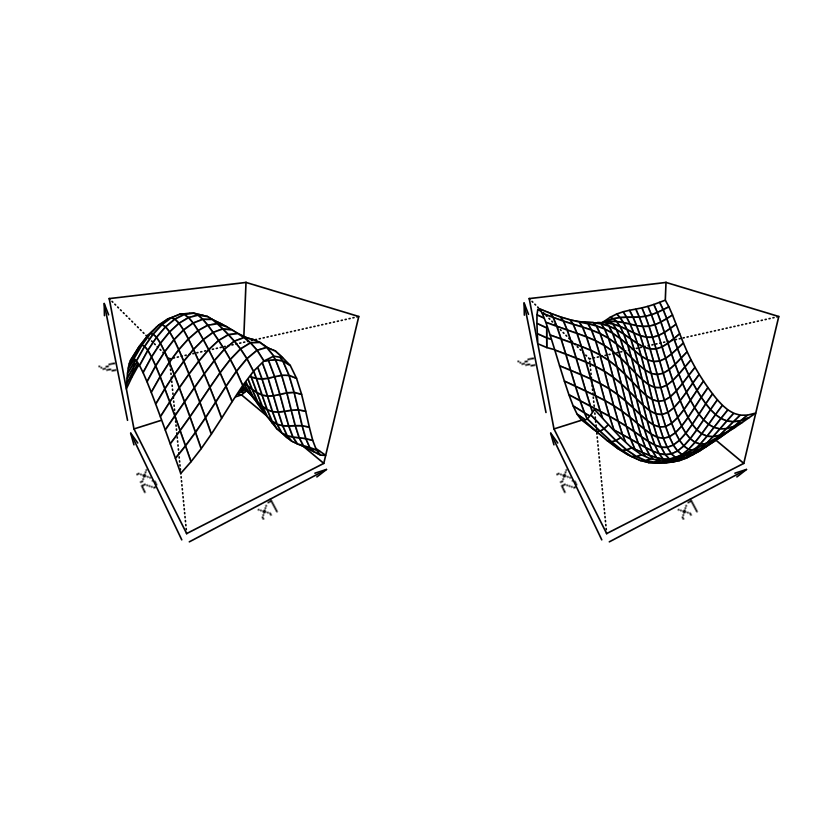

In [17]:
nx <- 20
x <- seq(0, 2, length=nx)
X <- expand.grid(x, x)
D <- distance(X)
Sigma <- exp(-D) + diag(eps, nrow(X))
Y <- rmvnorm(2, sigma=Sigma)
par(mfrow=c(1,2), pty="s") 
persp(x, x, matrix(Y[1,], ncol=nx), theta=-30, phi=30, xlab="x1", 
  ylab="x2", zlab="y")
persp(x, x, matrix(Y[2,], ncol=nx), theta=-30, phi=30, xlab="x1", 
  ylab="x2", zlab="y")

In [18]:
X <- randomLHS(40, 2)
X[,1] <- (X[,1] - 0.5)*6 + 1
X[,2] <- (X[,2] - 0.5)*6 + 1
y <- X[,1]*exp(-X[,1]^2 - X[,2]^2)

In [19]:
xx <- seq(-2, 4, length=40)
XX <- expand.grid(xx, xx)

In [20]:
D <- distance(X)
Sigma <- exp(-D)

In [21]:
DXX <- distance(XX)
SXX <- exp(-DXX) + diag(eps, ncol(DXX))
DX <- distance(XX, X)
SX <- exp(-DX)

In [22]:
Si <- solve(Sigma)
mup <- SX %*% Si %*% y
Sigmap <- SXX - SX %*% Si %*% t(SX)

In [23]:
sdp <- sqrt(diag(Sigmap))

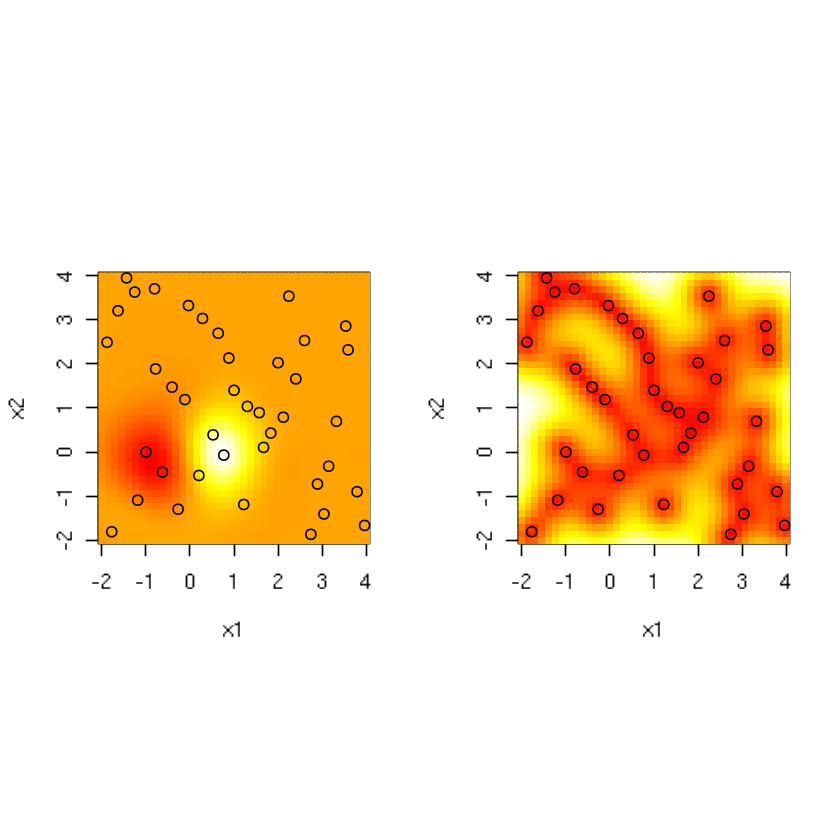

In [24]:
par(pty="s")
par(mfrow=c(1,2))
cols <- heat.colors(128)
image(xx, xx, matrix(mup, ncol=length(xx)), xlab="x1", ylab="x2", col=cols)
points(X[,1], X[,2])
image(xx, xx, matrix(sdp, ncol=length(xx)), xlab="x1", ylab="x2", col=cols)
points(X[,1], X[,2])

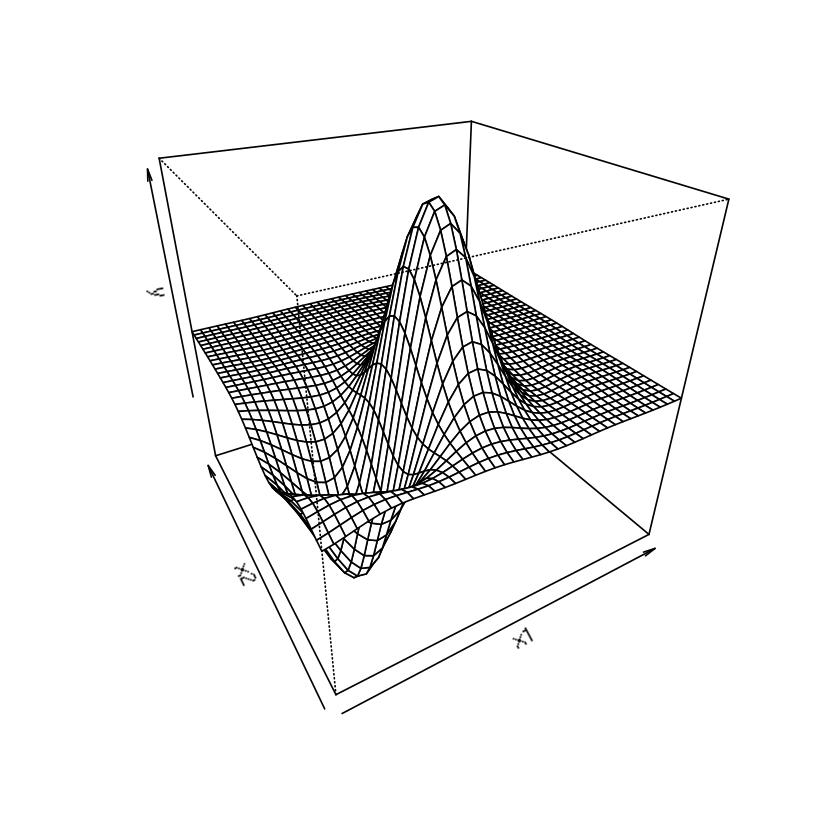

In [25]:
persp(xx, xx, matrix(mup, ncol=40), theta=-30, phi=30, xlab="x1", 
  ylab="x2", zlab="y")

## 5.2 hyperparameters

In [26]:
n <- 100
X <- matrix(seq(0, 10, length=n), ncol=1)
D <- distance(X)

In [27]:
C <- exp(-D) + diag(eps, n) 
tau2 <- 25
Y <- rmvnorm(100, sigma=tau2*C)

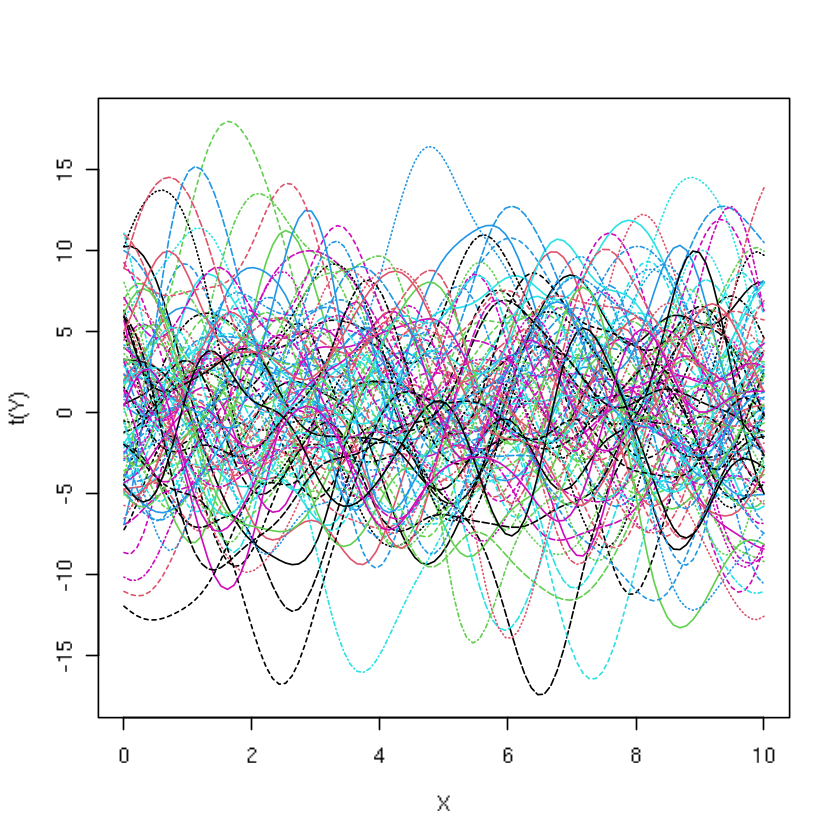

In [28]:
matplot(X, t(Y), type="l")

In [29]:
n <- 8
X <- matrix(seq(0, 2*pi, length=n), ncol=1)
y <- 5*sin(X)

In [30]:
D <- distance(X)
Sigma <- exp(-D)
XX <- matrix(seq(-5.5, 2*pi + 5.5, length=100), ncol=1)
DXX <- distance(XX)
SXX <- exp(-DXX) + diag(eps, ncol(DXX))
DX <- distance(XX, X)
SX <- exp(-DX)
Si <- solve(Sigma); 
mup <- SX %*% Si %*% y
Sigmap <- SXX - SX %*% Si %*% t(SX)

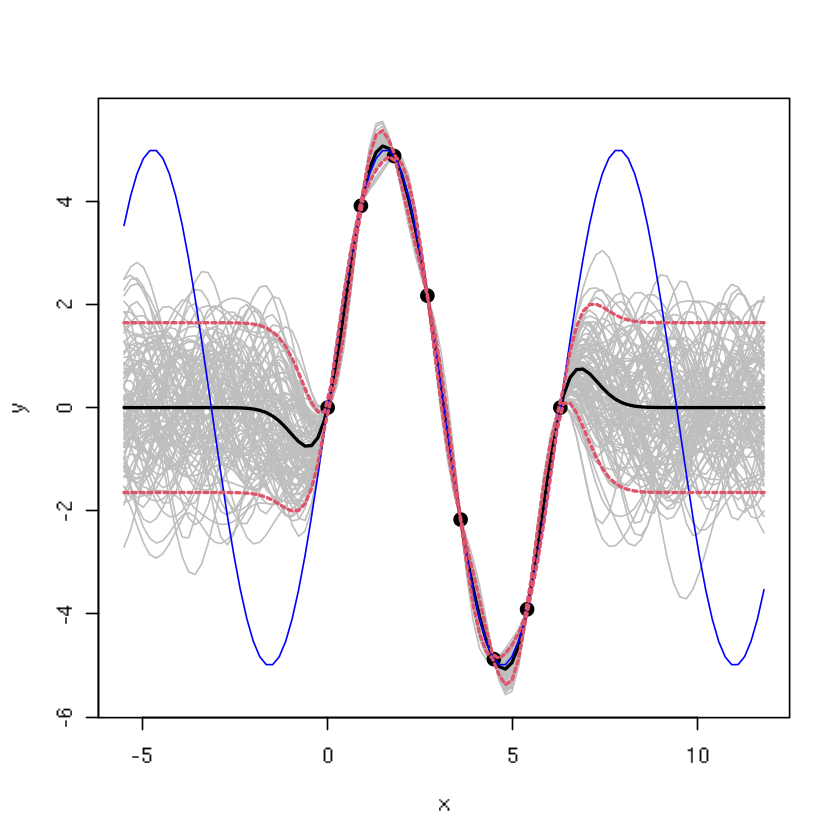

In [31]:
YY <- rmvnorm(100, mup, Sigmap)
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap)))
matplot(XX, t(YY), type="l", col="gray", lty=1, xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, mup, lwd=2)
lines(XX, 5*sin(XX), col="blue")
lines(XX, q1, lwd=2, lty=2, col=2)
lines(XX, q2, lwd=2, lty=2, col=2)

In [32]:
CX <- SX
Ci <- Si
CXX <- SXX
tau2hat <- drop(t(y) %*% Ci %*% y / length(y))

In [33]:
2*sqrt(tau2hat)

[1] 5.486648

In [34]:
mup2 <- CX %*% Ci %*% y
Sigmap2 <- tau2hat*(CXX - CX %*% Ci %*% t(CX))
YY <- rmvnorm(100, mup2, Sigmap2)
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap2)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap2)))

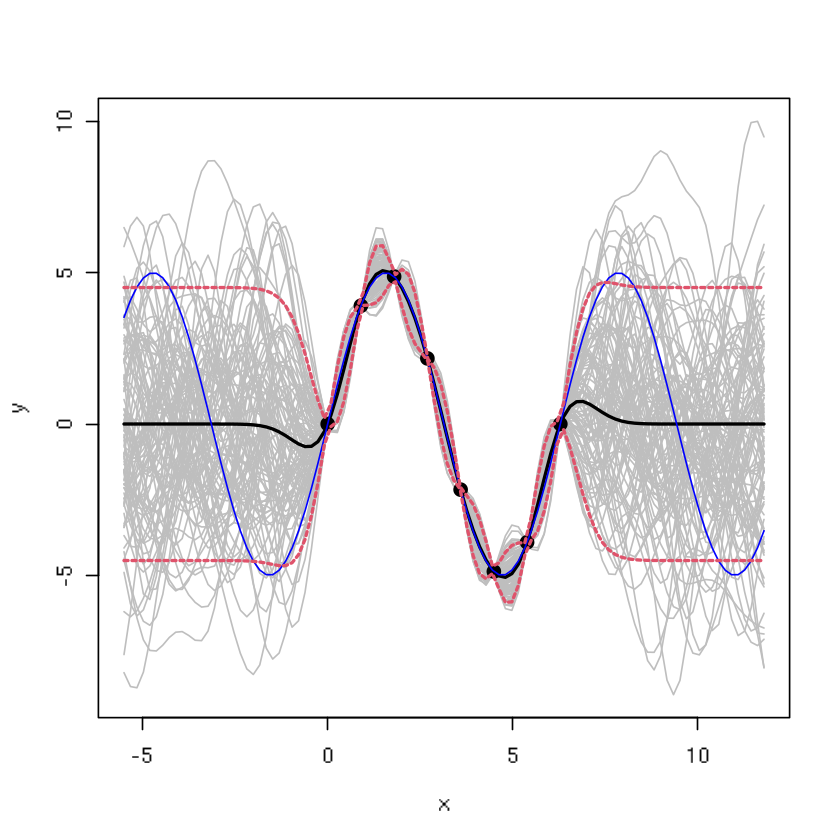

In [35]:
matplot(XX, t(YY), type="l", col="gray", lty=1, xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, mup, lwd=2)
lines(XX, 5*sin(XX), col="blue")
lines(XX, q1, lwd=2, lty=2, col=2); lines(XX, q2, lwd=2, lty=2, col=2)

In [36]:
score <- function(Y, mu, Sigma, mah=FALSE) {
  Ymmu <- Y - mu
  Sigmai <- solve(Sigma)
  mahdist <- t(Ymmu) %*% Sigmai %*% Ymmu
  if (mah) return(sqrt(mahdist))
  return (- determinant(Sigma, logarithm=TRUE)$modulus - mahdist)
}

In [37]:
Ytrue <- 5*sin(XX)
df <- data.frame(score(Ytrue, mup, Sigmap, mah=TRUE),
                 score(Ytrue, mup2, Sigmap2, mah=TRUE))
colnames(df) <- c("tau2=1", "tau2hat")
df

tau2=1,tau2hat
<dbl>,<dbl>
10.63097,3.875215


In [38]:
Ytrue <- 5*sin(XX)
df <- data.frame(score(Ytrue, mup, Sigmap, mah=FALSE),
                 score(Ytrue, mup2, Sigmap2, mah=FALSE))
colnames(df) <- c("tau2=1", "tau2hat")
df

tau2=1,tau2hat
<dbl>,<dbl>
1118.029,1014.195


In [39]:
nlg <- function(g, D, Y) {
  n <- length(Y)
  K <- exp(-D) + diag(g, n)
  Ki <- solve(K)
  ldetK <- determinant(K, logarithm=TRUE)$modulus
  ll <- - (n/2)*log(t(Y) %*% Ki %*% Y) - (1/2)*ldetK
  counter <<- counter + 1
  return(-ll)
}

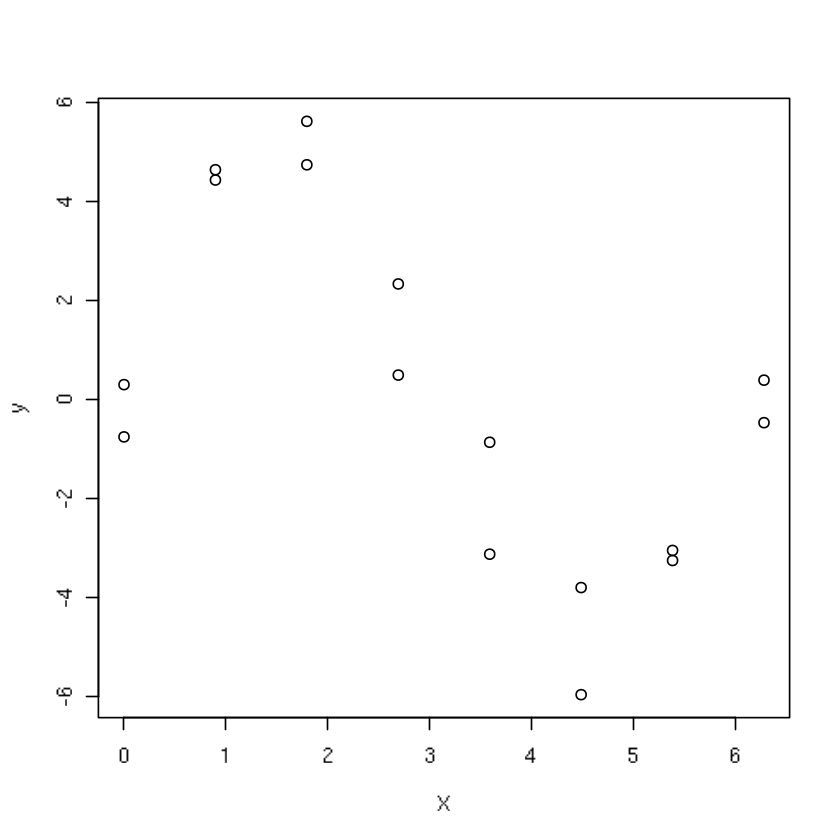

In [40]:
n = 8
X <- matrix(seq(0, 2*pi, length=n), ncol=1)
X <- rbind(X, X)
n <- nrow(X)
y <- 5*sin(X) + rnorm(n, sd=1)
plot(X, y)

In [41]:
D <- distance(X)

In [42]:
counter <- 0
g <- optimize(nlg, interval=c(eps, var(y)), D=D, Y=y)$minimum
g

[1] 0.1234335

In [43]:
counter

[1] 17

In [44]:
K <- exp(-D) + diag(g, n)
Ki <- solve(K)
tau2hat <- drop(t(y) %*% Ki %*% y / n)
c(tau=sqrt(tau2hat), sigma=sqrt(tau2hat*g))

tau    sigma 
2.778231 0.976079

In [45]:
XX <- matrix(seq(-5.5, 2*pi + 5.5, length=100), ncol=1)
DXX <- distance(XX)

In [46]:
DX <- distance(XX, X)
KX <- exp(-DX)
KXX <- exp(-DXX) + diag(g, nrow(DXX))

In [47]:
mup <- KX %*% Ki %*% y
Sigmap <- tau2hat*(KXX - KX %*% Ki %*% t(KX))
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap)))

In [48]:
Sigma.int <- tau2hat*(exp(-DXX) + diag(eps, nrow(DXX)) 
  - KX %*% Ki %*% t(KX))
YY <- rmvnorm(100, mup, Sigma.int)

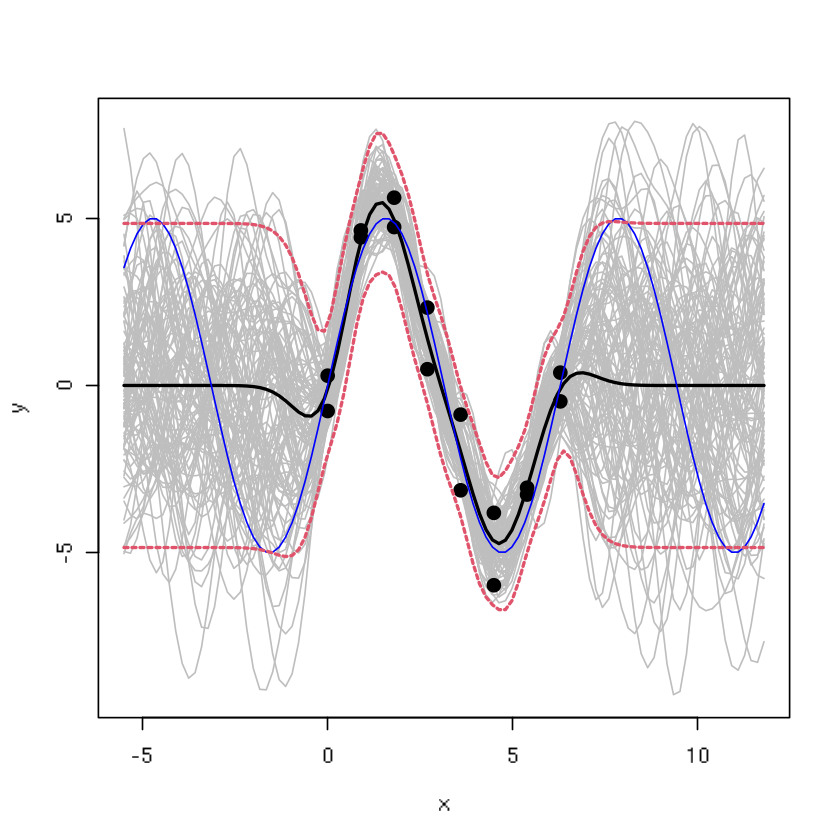

In [49]:
matplot(XX, t(YY), type="l", lty=1, col="gray", xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, mup, lwd=2)
lines(XX, 5*sin(XX), col="blue")
lines(XX, q1, lwd=2, lty=2, col=2)
lines(XX, q2, lwd=2, lty=2, col=2)

In [50]:
nlg.count <- counter
nlg.count

[1] 17

In [51]:
gnlg <- function(g, D, Y) {
  n <- length(Y)
  K <- exp(-D) + diag(g, n)
  Ki <- solve(K)
  KiY <- Ki %*% Y
  dll <- (n/2) * t(KiY) %*% KiY / (t(Y) %*% KiY) - (1/2)*sum(diag(Ki))
  return(-dll)
}

In [52]:
counter <- 0
out <- optim(0.1*var(y), nlg, gnlg, method="L-BFGS-B", lower=eps, upper=var(y), D=D, Y=y)
c(g, out$par)

[1] 0.1234335 0.1234152

In [53]:
c(out$counts, actual=counter)

function gradient   actual 
      14       14       14

### 5.2.4 Lengthscale

In [54]:
nl <- function(par, D, Y) {
  theta <- par[1]
  g <- par[2]
  n <- length(Y)
  K <- exp(-D/theta) + diag(g, n)
  Ki <- solve(K)
  ldetK <- determinant(K, logarithm=TRUE)$modulus
  ll <- -(n/2)*log(t(Y) %*% Ki %*% Y) - (1/2)*ldetK
  counter <<- counter + 1
  return(-ll)
}

In [55]:
library(lhs)
X2 <- randomLHS(40, 2)
X2 <- rbind(X2, X2)
X2[,1] <- (X2[,1] - 0.5)*6 + 1
X2[,2] <- (X2[,2] - 0.5)*6 + 1
y2 <- X2[,1]*exp(-X2[,1]^2 - X2[,2]^2) + rnorm(nrow(X2), sd=0.01)

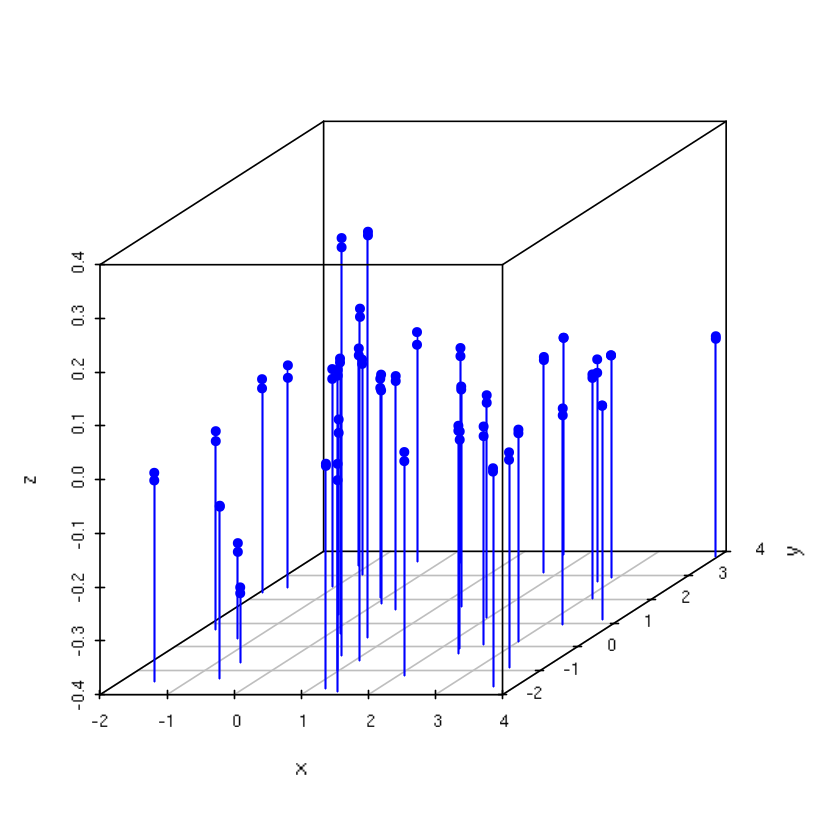

In [56]:
library(scatterplot3d)
xyz <- cbind(X2, y2)
colnames(xyz) <- c("x", "y", "z")
scatterplot3d(xyz, pch=16, type='h', color="blue")

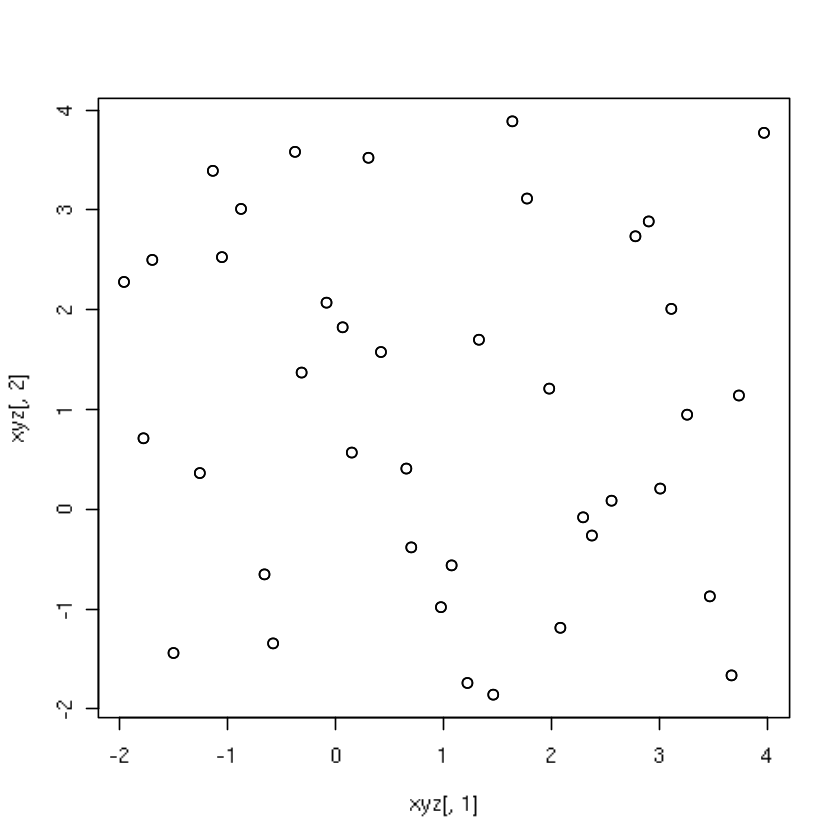

In [57]:
plot(xyz[,1], xyz[,2])

In [58]:
D <- distance(X2)
counter <- 0
out <- optim(c(0.1, 0.1*var(y)), nl, method="L-BFGS-B", lower=eps, upper=c(10, var(y2)), D=D, Y=y2)
out

$par
[1] 1.302904594 0.009517653

$value
[1] -103.0807

$counts
function gradient 
      12       12 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [59]:
brute <- c(out$counts, actual=counter)
brute

function gradient   actual 
      12       12       60

In [60]:
gradnl <- function(par, D, Y)
 {
  ## extract parameters
  theta <- par[1]
  g <- par[2]

  ## calculate covariance quantities from data and parameters
  n <- length(Y)
  K <- exp(-D/theta) + diag(g, n)
  Ki <- solve(K)
  dotK <- K*D/theta^2
  KiY <- Ki %*% Y

  ## theta component
  dlltheta <- (n/2) * t(KiY) %*% dotK %*% KiY / (t(Y) %*% KiY) - 
    (1/2)*sum(diag(Ki %*% dotK))

  ## g component
  dllg <- (n/2) * t(KiY) %*% KiY / (t(Y) %*% KiY) - (1/2)*sum(diag(Ki))
    
  ## combine the components into a gradient vector
  return(-c(dlltheta, dllg))
 }

In [61]:
counter <- 0
outg <- optim(c(0.1, 0.1*var(y2)), nl, gradnl, method="L-BFGS-B",
  lower=eps, upper=c(10, var(y2)), D=D, Y=y2)
rbind(grad=outg$par, brute=out$par)

grad,1.305155,0.009448709
brute,1.302905,0.009517653


In [62]:
rbind(grad=c(outg$counts, actual=counter), brute)

,function,gradient,actual
grad,11,11,11
brute,12,12,60


In [63]:
K <- exp(-D/outg$par[1]) + diag(outg$par[2], nrow(X2))
Ki <- solve(K)
tau2hat <- drop(t(y2) %*% y2 / nrow(X2))

In [64]:
gn <- 40
xx <- seq(-2, 4, length=gn)
XX <- expand.grid(xx, xx)
DXX <- distance(XX)
KXX <- exp(-DXX/outg$par[1]) + diag(outg$par[2], ncol(DXX))
DX <- distance(XX, X2)
KX <- exp(-DX/out$par[1])

In [65]:
mup <- KX %*% Ki %*% y2
Sigmap <- tau2hat*(KXX - KX %*% Ki %*% t(KX))
sdp <- sqrt(diag(Sigmap))

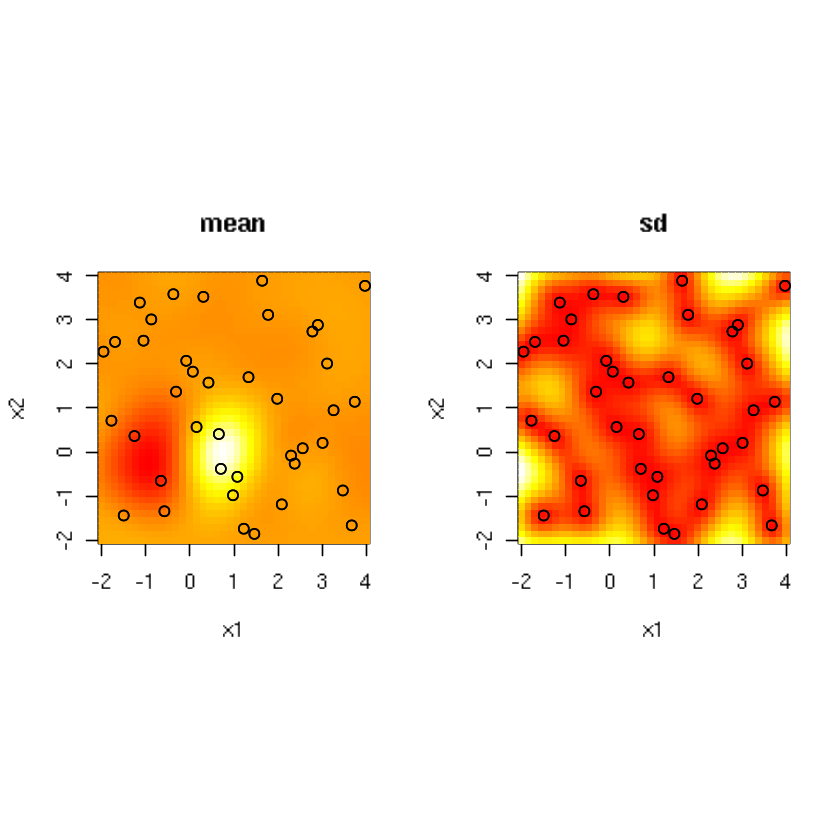

In [66]:
par(mfrow=c(1,2), pty="s")
image(xx, xx, matrix(mup, ncol=gn), main="mean", xlab="x1", ylab="x2", col=cols)
points(X2)
image(xx, xx, matrix(sdp, ncol=gn), main="sd", xlab="x1", ylab="x2", col=cols)
points(X2)

### 5.2.5 Anistropic modeling

In [67]:
fried <- function(n=50, m=6)
 {
  if(m < 5) stop("must have at least 5 cols")
  X <- randomLHS(n, m)
  Ytrue <- 10*sin(pi*X[,1]*X[,2]) + 20*(X[,3] - 0.5)^2 + 10*X[,4] + 5*X[,5]
  Y <- Ytrue + rnorm(n, 0, 1)
  return(data.frame(X, Y, Ytrue))
 }

In [68]:
m <- 7
n <- 200
nprime <- 1000
ntotal <- n + nprime
data <- fried(ntotal, m)
X <- as.matrix(data[1:n,1:m])
y <- drop(data$Y[1:n])
XX <- as.matrix(data[(n + 1):(ntotal),1:m])
yy <- drop(data$Y[(n + 1):(ntotal)])
yytrue <- drop(data$Ytrue[(n + 1):(ntotal)])

In [69]:
dim(X)
length(yy)
dim(data)

[1] 200   7

[1] 1000

[1] 1200    9

In [70]:
dim(data)

[1] 1200    9

In [71]:
D <- distance(X)
out <- optim(c(0.1, 0.1*var(y)), nl, gradnl, method="L-BFGS-B", lower=eps, 
  upper=c(10, var(y)), D=D, Y=y)
out

$par
[1] 3.418583436 0.006597232

$value
[1] 674.4815

$counts
function gradient 
      28       28 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [72]:
K <- exp(- D/out$par[1]) + diag(out$par[2], nrow(D))
Ki <- solve(K)
tau2hat <- drop(t(y) %*% Ki %*% y / nrow(D))

In [73]:
DXX <- distance(XX)
KXX <- exp(-DXX/out$par[1]) + diag(out$par[2], ncol(DXX))
DX <- distance(XX, X)
KX <- exp(-DX/out$par[1])

In [74]:
mup <- KX %*% Ki %*% y
Sigmap <- tau2hat*(KXX - KX %*% Ki %*% t(KX))

In [75]:
rmse <- c(gpiso=sqrt(mean((yytrue - mup)^2)))
rmse

gpiso 
1.469315

In [76]:
library(mda)
fit.mars <- mars(X, y)
p.mars <- predict(fit.mars, XX)

Loading required package: class

Loaded mda 0.5-2




In [77]:
rmse <- c(rmse, mars=sqrt(mean((yytrue - p.mars)^2)))
rmse

gpiso     mars 
1.469315 1.627821

In [78]:
nlsep <- function(par, X, Y) 
 {
  theta <- par[1:ncol(X)]  
  g <- par[ncol(X)+1]
  n <- length(Y)
  K <- covar.sep(X, d=theta, g=g)
  Ki <- solve(K)
  ldetK <- determinant(K, logarithm=TRUE)$modulus
  ll <- - (n/2)*log(t(Y) %*% Ki %*% Y) - (1/2)*ldetK
  counter <<- counter + 1
  return(-ll)
 }

In [79]:
tic <- proc.time()[3]
counter <- 0 
out <- optim(c(rep(0.1, ncol(X)), 0.1*var(y)), nlsep, method="L-BFGS-B", 
  X=X, Y=y, lower=eps, upper=c(rep(10, ncol(X)), var(y)))
toc <- proc.time()[3]
out$par

[1]  0.955570126  1.004752862  1.639042751  9.910363900  9.305369662
[6]  9.082032260 10.000000000  0.008976446

In [80]:
brute <- c(out$counts, actual=counter)
brute

function gradient   actual 
     101      101     1717

In [81]:
toc - tic

elapsed 
  4.107

In [82]:
gradnlsep <- function(par, X, Y)
 {
  theta <- par[1:ncol(X)]
  g <- par[ncol(X)+1]
  n <- length(Y)
  K <- covar.sep(X, d=theta, g=g) 
  Ki <- solve(K)
  KiY <- Ki %*% Y

  ## loop over theta components
  dlltheta <- rep(NA, length(theta))
  for(k in 1:length(dlltheta)) {
    dotK <- K * distance(X[,k])/(theta[k]^2)
    dlltheta[k] <- (n/2) * t(KiY) %*% dotK %*% KiY / (t(Y) %*% KiY) - 
      (1/2)*sum(diag(Ki %*% dotK))
  }

  ## for g   
  dllg <- (n/2) * t(KiY) %*% KiY / (t(Y) %*% KiY) - (1/2)*sum(diag(Ki))
    
  return(-c(dlltheta, dllg))
 }

In [83]:
tic <- proc.time()[3]
counter <- 0
outg <- optim(c(rep(0.1, ncol(X)), 0.1*var(y)), nlsep, gradnlsep, 
  method="L-BFGS-B", lower=eps, upper=c(rep(10, ncol(X)), var(y)), X=X, Y=y) 
toc <- proc.time()[3]
thetahat <- rbind(grad=outg$par, brute=out$par)
colnames(thetahat) <- c(paste0("d", 1:ncol(X)), "g")
thetahat

,d1,d2,d3,d4,d5,d6,d7,g
grad,0.9565790,1.002290,1.653000,10.000000,10.00000,10.000000,10,0.008814498
brute,0.9555701,1.004753,1.639043,9.910364,9.30537,9.082032,10,0.008976446


In [84]:
rbind(grad=c(outg$counts, actual=counter), brute)

,function,gradient,actual
grad,132,132,132
brute,101,101,1717


In [85]:
toc - tic

elapsed 
  1.028

In [86]:
K <- covar.sep(X, d=outg$par[1:ncol(X)], g=outg$par[ncol(X)+1])
Ki <- solve(K)
tau2hat <- drop(t(y) %*% Ki %*% y / nrow(X))
KXX <- covar.sep(XX, d=outg$par[1:ncol(X)], g=outg$par[ncol(X)+1]) 
KX <- covar.sep(XX, X, d=outg$par[1:ncol(X)], g=0)
mup2 <- KX %*% Ki %*% y
Sigmap2 <- tau2hat*(KXX - KX %*% Ki %*% t(KX))

In [87]:
rmse <- c(rmse, gpsep=sqrt(mean((yytrue - mup2)^2)))
rmse

gpiso      mars     gpsep 
1.4693155 1.6278210 0.6521877

In [88]:
scores <- c(gp=score(yy, mup, Sigmap), mars=NA, 
  gpsep=score(yy, mup2, Sigmap2))
scores

gp      mars     gpsep 
-1502.734        NA -1223.078